# Lecture 4 Exercises

In [5]:
# Don't forget to run this 

import pandas as pd

%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.set('poster')

In [6]:
# Exercise 1 - Football stats
#
#
# In this exercise, you will take the mean value of some columns in a dataframe.
# This is done using the following command: 
#
# my_dataframe['column_name'].mean()
#
#
# We ask you to:
# 1 -  Load the csv file in 'Euro2012stats.csv' as a dataframe.
# 2 -  Create a new dataframe, containing only the columns Team, Yellow Cards and Red Cards.
# 3a - Filter teams that scored more than 5 goals, and print the mean of the column Goals.
# 3b - Filter teams that scored exactly   5 goals, and print the mean of the column Goals.
# 3c - Filter teams that scored less than 5 goals, and print the mean of the column Goals.
# 3d - Filter teams that scored either more or less than 5 goals (but not 5),
#      and print the mean of the column Goals.

#################################
# Your code below here

# Reading data from CSV file into base dataframe
euro_2012_df = pd.read_csv('Euro2012stats.csv')

# New filtered dataframe
filtered_df = euro_2012_df[['Team', 'Yellow Cards', 'Red Cards', 'Goals']].copy()

# More than 5 goals
over_five_df = filtered_df[euro_2012_df['Goals'] > 5]
print(f"Goals > 5 Mean: {over_five_df['Goals'].mean()}")

# Exactly 5 goals
over_five_df = filtered_df[euro_2012_df['Goals'] == 5]
print(f"Goals = 5 Mean: {over_five_df['Goals'].mean()}")

# Less than 5 goals
over_five_df = filtered_df[euro_2012_df['Goals'] < 5]
print(f"Goals < 5 Mean: {over_five_df['Goals'].mean()}")

# Less or More than but not 5 goals
over_five_df = filtered_df[(euro_2012_df['Goals'] > 5) | (euro_2012_df['Goals'] < 5) & (euro_2012_df['Goals'] != 5)]
print(f"Goals > or < 5 and not = 5 Mean: {over_five_df['Goals'].mean()}")

Goals > 5 Mean: 8.5
Goals = 5 Mean: 5.0
Goals < 5 Mean: 2.75
Goals > or < 5 and not = 5 Mean: 4.666666666666667


In [7]:
# Exercise 2: More football stats
#
# We ask you to:
# 1 - Load the csv file in 'Euro2012stats.csv' as a dataframe.
#
# 2 - Create a new column in that dataframe, with the number of letters
#     in the name of each country.
#
# 3 - From that dataframe, create a new dataframe containing only the teams
#     that have more than 10 Yellow Cards OR at least one Red Card.
#
# 4 - Sort that new dataframe, according to the column you created in (2),
#     going from the country with the shortest name to the country with the longest name.
#
# 5 - Iterate through the sorted dataframe, printing the name of every country
#     and its 'Saves-to-shots ratio'.

#################################
# Your code below here

# Reading data from CSV file into base dataframe
euro_2012_df = pd.read_csv('Euro2012stats.csv')
country_letters_df = euro_2012_df.copy()

# Getting the number of letters in each country's name
country_letters_df['Name Letter Count'] = euro_2012_df['Team'].apply(lambda text: sum(char.isalpha() for char in text))
country_letters_df[['Team', 'Name Letter Count']].head()

# Filtered dataframe with teams having 10 yellows or 1 red
cards_df = country_letters_df[(euro_2012_df['Yellow Cards'] > 10) | (euro_2012_df['Red Cards'] >= 1)]
cards_df[['Team', 'Yellow Cards', 'Red Cards']].head()

# Sort teams based on name length in ascending order
sorted_names_df = cards_df.sort_values(by='Name Letter Count', ascending=True)
sorted_names_df[['Team', 'Name Letter Count', 'Yellow Cards', 'Red Cards']]

# Print sorted dataframe with name and saves to shots ratio
sorted_names_df[['Team', 'Saves-to-shots ratio']]

,Team,Saves-to-shots ratio
7,Italy,74.1%
13,Spain,93.8%
6,Greece,65.1%
9,Poland,66.7%
10,Portugal,71.5%
11,Republic of Ireland,65.4%


Text(0, 0.5, 'Teams')

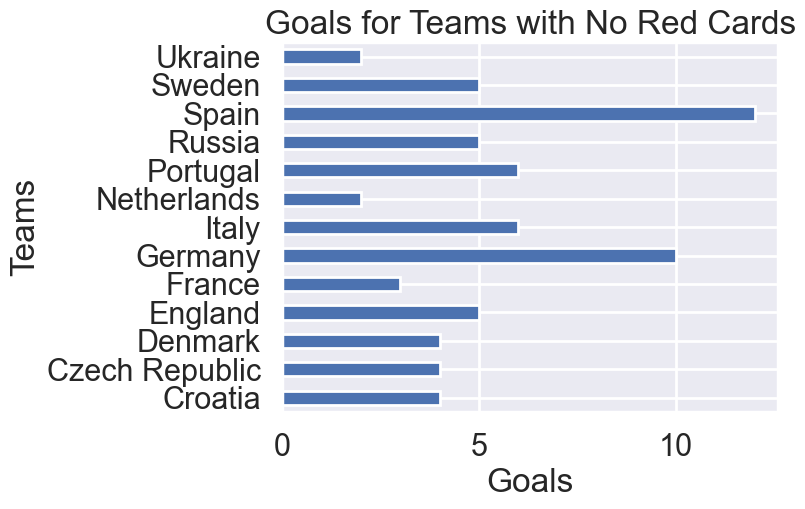

In [8]:
# Exercise 3a: Visualising football stats, part A
#
# For this exercise, you will need two new things:
#
# Here's how to plot a horizontal bar chart:
### my_dataframe['column_name'].plot.barh()
#
# And here's how to change the index of a dataframe to one of its columns:
### my_indexed_dataframe = my_dataframe.set_index('column_name')
#
# With that in mind:
#
# 1 - Load the csv file in 'Euro2012stats.csv' as a dataframe.
#
# 2 - Set the column 'Team' to be its index
#
# 3 - Make a horizontal bar plot of the number of goals per team, 
# but only for the teams that received zero Red Cards.
#
# Tip: increase the figuresize by using the figsize command, as in the lecture notes.

#################################
# Your code below here

# Reading data from CSV file into base dataframe
euro_2012_df = pd.read_csv('Euro2012stats.csv')

# Setting 'Team' to be the index
euro_2012_df = euro_2012_df.set_index('Team')

no_red_cards_df = euro_2012_df[euro_2012_df['Red Cards'] == 0]

# Plotting number of goals per team provided they got no red cards
ax = no_red_cards_df['Goals'].plot.barh()
ax.set_title('Goals for Teams with No Red Cards')
ax.set_xlabel('Goals')
ax.set_ylabel('Teams')

Text(0, 0.5, 'number of teams')

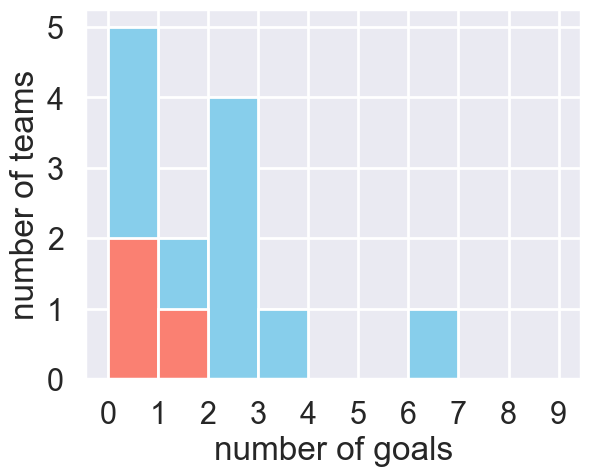

In [13]:
# Exercise 3b: Visualising football stats, part B
#
# To make a histogram, you can use the function presented in the lecture notes:
### my_dataframe['column_name'].hist()
#
# Inside the (), you can put various arguments, listed in the links below:
# - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
# - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
# 
# With that in mind:
#
# 1 - Load the csv file in 'Euro2012stats.csv' as a dataframe.
#
# 2 - Make a histogram for the variable 'Hit Woodwork', but only for the teams
# that received zero Red Cards, setting the bins to range(10), and the color to 'skyblue'.
#
# 3 - Make a histogram for the variable 'Hit Woodwork', but only for the teams
#     that received Red Cards, setting the bins to range(10), and the color to 'salmon'.
#
# 4 - Set the ticks on the x axis to range(10) using:
#     my_histogram.set_xticks( range(10)),
#     where my_histogram is the name of your histogram variable.
#
# 5 - Set the xlabel of the histogram to 'number of goals', and
#     the ylabel of the histogram to 'number of teams'.
#
#
#################################
# Your code below here

# Reading data from CSV file into base dataframe
euro_2012_df = pd.read_csv('Euro2012stats.csv')

# No red cards filtered dataframe visualised as histogram
no_red_hit_wood_df = euro_2012_df[euro_2012_df['Red Cards'] == 0]
ax = no_red_hit_wood_df['Hit Woodwork'].hist(bins=range(10), color='skyblue')

# Only red cards filtered dataframe visualised as histogram
only_red_hit_wood_df = euro_2012_df[euro_2012_df['Red Cards'] > 0]
ax = only_red_hit_wood_df['Hit Woodwork'].hist(bins=range(10), color='salmon')

# Plot settings
ax.set_xticks(range(10))
ax.set_xlabel('number of goals')
ax.set_ylabel('number of teams')

**Before exercises 4 and 5, first run the code below. But see if you can understand what the code is doing.**

We are going to look which authors comment more or get more likes. Here we have three dictionaries, *comment_count*, *likes_count* and *replies_count*, which have author names as keys, and number of comments, likes and replies as values, respectively. We then make a dataframe based on all that information.

In [38]:
raw_comments = pd.read_csv('IoP18_kpop_comments.tsv', delimiter='\t')

to_filter = ['CommentPublished','CommentTextDisplay','CommentAuthorName',
             'CommentLikeCount','CommentTotalReplyCount','Title']

comments = raw_comments.filter(items=to_filter).dropna()

comment_count = {}
likes_count   = {}
replies_count = {}

for index, row in comments.iterrows():
    
    author = row.CommentAuthorName
    number_of_likes   = int(row.CommentLikeCount)
    number_of_replies = int(row.CommentTotalReplyCount)
    
    # Count comments
    if author not in comment_count:
        comment_count[author]  = 1
    else:
        comment_count[author] += 1
    
    # Count likes
    if author not in likes_count:
        likes_count[author]  = number_of_likes
    else:
        likes_count[author] += number_of_likes
    
    # Count replies
    if author not in replies_count:
        replies_count[author]  = number_of_replies
    else:
        replies_count[author] += number_of_replies


all_authors = comment_count.keys()

data_dict = { 'Author'      :list( all_authors ),
              'CommentCount':list( comment_count.values() ),
              'TotalLikes'  :list( likes_count.values()   ),
              'TotalReplies':list( replies_count.values() ) }

authors = pd.DataFrame(data_dict)

authors.head()

,Author,CommentCount,TotalLikes,TotalReplies
0,Naomi Nicole Yambao,1,0,0
1,Ahmad Farhan Zarin,1,0,0
2,sheridan tulio,1,0,0
3,Seraph Gaming,1,0,0
4,Ashleigh Sharman,1,0,0


,Author,CommentCount,TotalLikes,TotalReplies
1673,Kim Jong Kai,18,1392,247


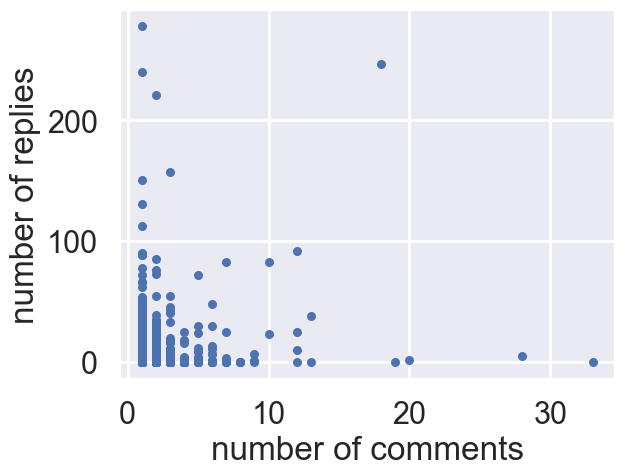

In [39]:
# Exercise 4: Plotting authors
#
# Now that we hava a dataframe containing all authors:
#
# 1 - make a scatter plot with 'CommentCount' in the x axis and 'TotalReplies' in the y axis.
#
# 2 - Set the xlabel of the scatter plot to 'number of comments',
# and the ylabel to 'number of replies'.
#
# 3 - You should find that there is only one Author with over 15 comments and over 200 replies.
# Find the name of that Author by using masks on the dataframe 'authors' and on the variables
# 'CommentCount' and 'TotalReplies' so that you produce a dataframe with a single row,
# containing that Author, as well as their number of comments, likes and replies.
# Finally, display that dataframe using display(that_dataframe).
#
#################################
# Your code below here

# Authors scatter plot
scatter_plot = authors.plot.scatter(x='CommentCount', y='TotalReplies')
scatter_plot.set_xlabel('number of comments')
scatter_plot.set_ylabel('number of replies')

# Author with 15+ comments and 200+ replies
best_author_df = authors[(authors['CommentCount'] > 15) & (authors['TotalReplies'] > 200)]
display(best_author_df)

In [45]:
# Exercise 5: Printing full comments
#
# 1 - Sort your dataframe according to 'TotalLikes',
# from the author with most likes to the author with the fewest likes.
#
# 2 - Using the 'comments' dataframe as defined above,
# print all the comments by the author with most likes.

#################################
# Your code below here

# Sorting by # of likes
most_liked_df = authors.sort_values(by=['TotalLikes'], ascending=False)

display(most_liked_df)
comments_df = comments[comments['CommentAuthorName'] == 'realistic dreamer']
display(comments)

,Author,CommentCount,TotalLikes,TotalReplies
4025,realistic dreamr,2,3824,85
2807,Kai,2,2415,221
7053,claire oh,1,2330,131
3517,vin dm,1,2286,66
6225,Alix Malone,3,2111,55
...,...,...,...,...
4610,dav napa,1,0,0
4606,Anastasi a,1,0,0
4604,bwitaminu,1,0,0
4603,Bubbles RinL-Ahgase,1,0,0


,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount,Title
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
...,...,...,...,...,...,...
14995,2015-01-14T19:40:08.000Z,@ 2:16 Kai dropped and picked up his hat,Melon Melody123,1.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
14996,2015-01-14T15:32:31.000Z,HAPPY BIRTHDAY TO OUR SWEET AS SUGAR KIM JONGI...,Marianna,5.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
14997,2015-01-14T14:22:22.000Z,EXO Growl is the 5th most viewed mv in SMTOWN!...,"When a unicorn farted, Lay existed",2.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
14998,2015-01-14T11:34:38.000Z,And now HAPPY BIRTHDAY TO KIM JONG IN! I LOVE ...,Jongin's Sugarmommy,2.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
